In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



In [3]:
application='data/application.tsv.zip'
df=pd.read_csv(application, compression='zip', sep='\t')
df=df[['patent_id','date']]

dst='data/application.parquet.gz'
df = df.rename(columns={'date': 'application_date'})
#df.to_parquet(dst, compression='gzip', index=False)
df.memory_usage()

/home/renato/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index                    128
patent_id           54554896
application_date    54554896
dtype: int64

In [4]:
# distribution of foreign citations per year
patent='data/cleanpatent.parquet.gz'
df_pat = pd.read_parquet(patent)

df_pat=df_pat.join(df.set_index('patent_id'), how='inner')

In [5]:
df_pat.head()

,date,num_claims,application_date
10000000,2018,20,2015-03-10
10000001,2018,12,2015-12-08
10000002,2018,9,2014-12-30
10000003,2018,18,2013-03-12
10000004,2018,6,2015-12-17


In [9]:
df_pat['application_date']=pd.to_datetime(df_pat['application_date'], errors='coerce')

In [11]:
df_pat['grant_delay']=df_pat['date']-df_pat['application_date'].dt.year

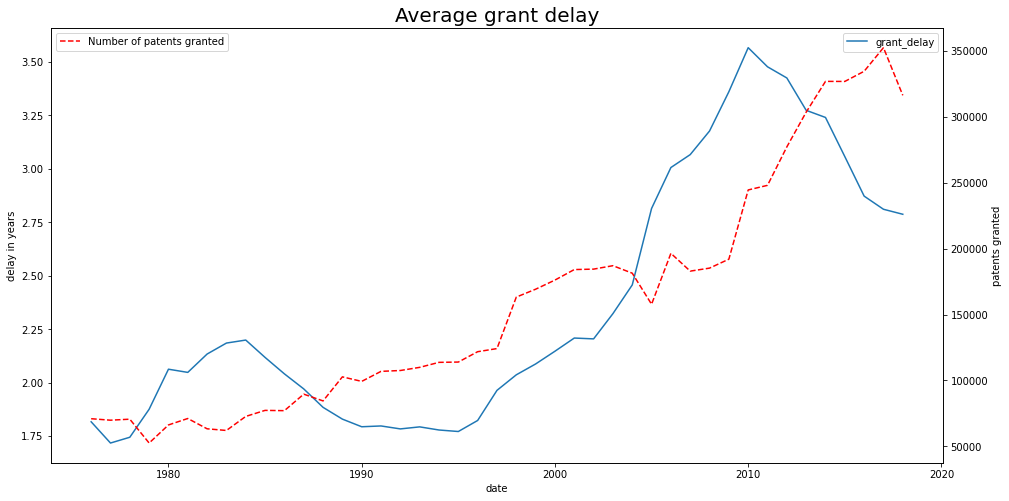

In [43]:
title='Average Grant delay'
ylabel='delay in years'
figsize=(16, 8)
ax1=df_pat.groupby('date')['grant_delay'].mean().plot(figsize=figsize, ylabel=ylabel, xlabel=None)
ax1.legend()
ax1.set_title(label=title, fontsize=20)

ax2=ax1.twinx()

label='Number of patents granted'
ylabel='patents granted'
df_pat.groupby('date').size().plot(ax=ax2, style='r--', label=label, ylabel=ylabel)
ax2.legend()